In [242]:
!pip install catboost

In [243]:
!pip3 install xgboost

You should consider upgrading via the 'c:\users\annab\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [244]:
!pip install lightgbm

In [245]:
# import packages
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, cross_val_score
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# set the aesthetic style of the plots
sns.set_style()

# filter warning messages
import warnings
warnings.filterwarnings('ignore')

In [246]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [247]:
df = pd.read_csv('C:/Users/annab/OneDrive/Documents/Python jobs/OCBC/acquisition_train.csv',index_col=0)
df.head(3)

,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,reason,income,facebook_profile,state,zip,channel,job_name,real_state,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_applied,application_time_in_funnel,email,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_first_name,external_data_provider_fraud_score,lat_lon,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code,profile_tags,user_agent,target_fraud
ids,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
343b7e7b-2cf8-e508-b8fd-0a0285af30aa,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,25033.92,36.0,0.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65014.12,True,sjJbkqJS7cXalHLBFA+EOQ==,Ernn+uVXCMq/6ARrBCcd+A==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,NaN,0.0,0.0,18.0,18.0,07:52:34,444,outlook.com,NaN,2,0.0,51.0,leidelaura,645,"(-29.151545708122246, -51.1386461804385)",Invite-email,514-9840782,57849.0,BR-MT,17528,"{'tags': ['n19', 'n8']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
bc2c7502-bbad-0f8c-39c3-94e881967124,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,NaN,NaN,39726.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,100018.91,False,xsd3ZdsI3356I3xMxZeiqQ==,rlWIXTBO+VOa34+SpGyhlQ==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,50.0,0.0,0.0,14.0,14.0,02:34:29,346,gmail.com,0.0,1,0.0,17.0,diocezio,243,"(-19.687710705798963, -47.94151536525154)",Radio-commercial,251-3659293,4902.0,BR-RS,40933,"{'tags': ['n6', 'n7', 'nim']}",Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...,NaN
669630dd-2e6a-0396-84bf-455e5009c922,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,7207.92,36.0,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65023.65,NaN,Ygq6MsM98oC8yceExr69Ig==,PjTIDfJsK0DKL9fO7vuW2g==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,NaN,0.0,0.0,10.0,NaN,0.041689815,6,gmail.com,NaN,2,NaN,9.0,veralucia,65,"(-28.748023890412284, -51.867279334353995)",Waiting-list,230-6097993,163679.0,BR-RR,50985,"{'tags': ['n0', 'n17', 'nim', 'da']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN


In [248]:
df.shape

(45000, 42)

In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45000 entries, 343b7e7b-2cf8-e508-b8fd-0a0285af30aa to a7504e93-123a-f965-70c6-ab01a0d475f7
Data columns (total 42 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   target_default                                    41741 non-null  object 
 1   score_1                                           44438 non-null  object 
 2   score_2                                           44438 non-null  object 
 3   score_3                                           44438 non-null  float64
 4   score_4                                           45000 non-null  float64
 5   score_5                                           45000 non-null  float64
 6   score_6                                           45000 non-null  float64
 7   risk_rate                                         44438 non-null  float64
 8   last_amount_borrowed               

In [250]:
# check the missing value in the dataset
df.isnull().sum()

target_default                                       3259
score_1                                               562
score_2                                               562
score_3                                               562
score_4                                                 0
score_5                                                 0
score_6                                                 0
risk_rate                                             562
last_amount_borrowed                                29956
last_borrowed_in_months                             29956
credit_limit                                        13800
reason                                                566
income                                                562
facebook_profile                                     4458
state                                                 562
zip                                                   562
channel                                               562
job_name      

In [251]:
(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)*100

target_fraud                                        96.617778
last_amount_borrowed                                66.568889
last_borrowed_in_months                             66.568889
ok_since                                            58.988889
external_data_provider_credit_checks_last_2_year    50.284444
external_data_provider_credit_checks_last_year      33.608889
credit_limit                                        30.666667
n_issues                                            25.653333
facebook_profile                                     9.906667
marketing_channel                                    7.951111
job_name                                             7.413333
target_default                                       7.242222
external_data_provider_email_seen_before             4.962222
lat_lon                                              3.028889
user_agent                                           1.604444
n_bankruptcies                                       1.548889
n_defaul

In [252]:
df_credit_null = df[df['target_default'].isnull()]
df_credit_null.shape

(3259, 42)

In [253]:
df_credit = df.dropna(subset = ['target_default'])
df_credit.shape

(41741, 42)

In [254]:
# 'target_default' has nearly 100% missing value and it does not add value to the prediction, so we will drop this column as well
df_credit.drop('target_fraud',axis=1,inplace=True)
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41741 entries, 343b7e7b-2cf8-e508-b8fd-0a0285af30aa to a7504e93-123a-f965-70c6-ab01a0d475f7
Data columns (total 41 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   target_default                                    41741 non-null  object 
 1   score_1                                           41741 non-null  object 
 2   score_2                                           41741 non-null  object 
 3   score_3                                           41741 non-null  float64
 4   score_4                                           41741 non-null  float64
 5   score_5                                           41741 non-null  float64
 6   score_6                                           41741 non-null  float64
 7   risk_rate                                         41741 non-null  float64
 8   last_amount_borrowed               

In [255]:
df_credit.head(3)

,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,reason,income,facebook_profile,state,zip,channel,job_name,real_state,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_applied,application_time_in_funnel,email,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_first_name,external_data_provider_fraud_score,lat_lon,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code,profile_tags,user_agent
ids,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
343b7e7b-2cf8-e508-b8fd-0a0285af30aa,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,25033.92,36.0,0.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65014.12,True,sjJbkqJS7cXalHLBFA+EOQ==,Ernn+uVXCMq/6ARrBCcd+A==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,NaN,0.0,0.0,18.0,18.0,07:52:34,444,outlook.com,NaN,2,0.0,51.0,leidelaura,645,"(-29.151545708122246, -51.1386461804385)",Invite-email,514-9840782,57849.0,BR-MT,17528,"{'tags': ['n19', 'n8']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...
bc2c7502-bbad-0f8c-39c3-94e881967124,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,NaN,NaN,39726.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,100018.91,False,xsd3ZdsI3356I3xMxZeiqQ==,rlWIXTBO+VOa34+SpGyhlQ==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,50.0,0.0,0.0,14.0,14.0,02:34:29,346,gmail.com,0.0,1,0.0,17.0,diocezio,243,"(-19.687710705798963, -47.94151536525154)",Radio-commercial,251-3659293,4902.0,BR-RS,40933,"{'tags': ['n6', 'n7', 'nim']}",Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...
669630dd-2e6a-0396-84bf-455e5009c922,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,7207.92,36.0,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65023.65,NaN,Ygq6MsM98oC8yceExr69Ig==,PjTIDfJsK0DKL9fO7vuW2g==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,NaN,0.0,0.0,10.0,NaN,0.041689815,6,gmail.com,NaN,2,NaN,9.0,veralucia,65,"(-28.748023890412284, -51.867279334353995)",Waiting-list,230-6097993,163679.0,BR-RR,50985,"{'tags': ['n0', 'n17', 'nim', 'da']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...


In [256]:
import pandas_profiling

In [257]:
# profile = pandas_profiling.ProfileReport(df_credit)
# display(profile)

In [258]:
# We will get rid of columns which have constant value
col_constant = ['channel', 'external_data_provider_credit_checks_last_2_year']
#df_credit.drop(labels=['channel', 'external_data_provider_credit_checks_last_2_year'], axis=1, inplace=True)
df_credit.drop(labels=['channel', 'external_data_provider_credit_checks_last_2_year'], axis=1, inplace=True)

# We will get rid of highly co-related columns such as 'n_issues' & 'n_accounts'. Because 'n_issues' have more missing
# value (25%) than 'n_accounts'(1%), therefore we will get rid of 'n_issues'. 
df_credit.drop('n_issues',axis=1,inplace=True)

df_credit.head(3)

,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,reason,income,facebook_profile,state,zip,job_name,real_state,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,application_time_applied,application_time_in_funnel,email,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_first_name,external_data_provider_fraud_score,lat_lon,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code,profile_tags,user_agent
ids,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
343b7e7b-2cf8-e508-b8fd-0a0285af30aa,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,25033.92,36.0,0.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65014.12,True,sjJbkqJS7cXalHLBFA+EOQ==,Ernn+uVXCMq/6ARrBCcd+A==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,NaN,0.0,0.0,18.0,07:52:34,444,outlook.com,2,0.0,51.0,leidelaura,645,"(-29.151545708122246, -51.1386461804385)",Invite-email,514-9840782,57849.0,BR-MT,17528,"{'tags': ['n19', 'n8']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...
bc2c7502-bbad-0f8c-39c3-94e881967124,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,NaN,NaN,39726.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,100018.91,False,xsd3ZdsI3356I3xMxZeiqQ==,rlWIXTBO+VOa34+SpGyhlQ==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,50.0,0.0,0.0,14.0,02:34:29,346,gmail.com,1,0.0,17.0,diocezio,243,"(-19.687710705798963, -47.94151536525154)",Radio-commercial,251-3659293,4902.0,BR-RS,40933,"{'tags': ['n6', 'n7', 'nim']}",Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...
669630dd-2e6a-0396-84bf-455e5009c922,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,7207.92,36.0,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65023.65,NaN,Ygq6MsM98oC8yceExr69Ig==,PjTIDfJsK0DKL9fO7vuW2g==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,NaN,0.0,0.0,10.0,0.041689815,6,gmail.com,2,NaN,9.0,veralucia,65,"(-28.748023890412284, -51.867279334353995)",Waiting-list,230-6097993,163679.0,BR-RR,50985,"{'tags': ['n0', 'n17', 'nim', 'da']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...


In [259]:
df_credit = df_credit.reset_index()
df_credit.head(3)

,ids,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,reason,income,facebook_profile,state,zip,job_name,real_state,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,application_time_applied,application_time_in_funnel,email,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_first_name,external_data_provider_fraud_score,lat_lon,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code,profile_tags,user_agent
0,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,25033.92,36.0,0.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65014.12,True,sjJbkqJS7cXalHLBFA+EOQ==,Ernn+uVXCMq/6ARrBCcd+A==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,NaN,0.0,0.0,18.0,07:52:34,444,outlook.com,2,0.0,51.0,leidelaura,645,"(-29.151545708122246, -51.1386461804385)",Invite-email,514-9840782,57849.0,BR-MT,17528,"{'tags': ['n19', 'n8']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...
1,bc2c7502-bbad-0f8c-39c3-94e881967124,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,NaN,NaN,39726.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,100018.91,False,xsd3ZdsI3356I3xMxZeiqQ==,rlWIXTBO+VOa34+SpGyhlQ==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,50.0,0.0,0.0,14.0,02:34:29,346,gmail.com,1,0.0,17.0,diocezio,243,"(-19.687710705798963, -47.94151536525154)",Radio-commercial,251-3659293,4902.0,BR-RS,40933,"{'tags': ['n6', 'n7', 'nim']}",Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...
2,669630dd-2e6a-0396-84bf-455e5009c922,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,7207.92,36.0,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65023.65,NaN,Ygq6MsM98oC8yceExr69Ig==,PjTIDfJsK0DKL9fO7vuW2g==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,NaN,0.0,0.0,10.0,0.041689815,6,gmail.com,2,NaN,9.0,veralucia,65,"(-28.748023890412284, -51.867279334353995)",Waiting-list,230-6097993,163679.0,BR-RR,50985,"{'tags': ['n0', 'n17', 'nim', 'da']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...


In [260]:
# Now get rid of the columns which have no meaning to the prediction
col_drop = ['ids','email','profile_phone_number','facebook_profile','external_data_provider_first_name','lat_lon',
            'shipping_zip_code', 'user_agent','profile_tags','marketing_channel','application_time_applied']

df_credit.drop(labels=col_drop,axis=1,inplace=True)
df_credit.head(3)

,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,reason,income,state,zip,job_name,real_state,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,application_time_in_funnel,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income,shipping_state
0,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,25033.92,36.0,0.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65014.12,sjJbkqJS7cXalHLBFA+EOQ==,Ernn+uVXCMq/6ARrBCcd+A==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,NaN,0.0,0.0,18.0,444,2,0.0,51.0,645,57849.0,BR-MT
1,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,NaN,NaN,39726.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,100018.91,xsd3ZdsI3356I3xMxZeiqQ==,rlWIXTBO+VOa34+SpGyhlQ==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,50.0,0.0,0.0,14.0,346,1,0.0,17.0,243,4902.0,BR-RS
2,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,7207.92,36.0,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65023.65,Ygq6MsM98oC8yceExr69Ig==,PjTIDfJsK0DKL9fO7vuW2g==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,NaN,0.0,0.0,10.0,6,2,NaN,9.0,65,163679.0,BR-RR


In [261]:
df_credit.shape

(41741, 28)

In [262]:
df_credit.describe()

,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,application_time_in_funnel,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income
count,41741.000000,41741.000000,41741.000000,41741.000000,41741.000000,14133.000000,14133.000000,28632.000000,4.174100e+04,17276.000000,41606.000000,41729.000000,41741.000000,41741.000000,41741.000000,27720.000000,39656.000000,41741.000000,41741.0
mean,346.459836,100.006820,0.499416,99.919399,0.294451,13328.104095,40.588410,33877.220453,7.108012e+04,35.192174,0.076696,0.004625,10.639108,247.748545,1.504396,0.504185,12.731188,500.491771,inf
std,110.102271,3.183821,0.288085,10.022703,0.101561,7918.698433,9.437936,36141.985884,5.225978e+04,21.629577,0.274820,0.080157,4.588175,146.326172,1.114207,0.499992,125.711218,287.993121,NaN
min,0.000000,86.191572,0.000035,60.663039,0.000000,1005.180000,36.000000,0.000000,4.821180e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-999.000000,0.000000,403.0
25%,270.000000,97.862546,0.251595,93.182517,0.220000,7210.280000,36.000000,9975.000000,4.401958e+04,17.000000,0.000000,0.000000,7.000000,120.000000,1.000000,0.000000,11.000000,252.000000,50910.0
50%,340.000000,100.017950,0.500174,99.977774,0.290000,12011.050000,36.000000,25213.000000,6.004409e+04,32.000000,0.000000,0.000000,10.000000,248.000000,2.000000,1.000000,27.000000,502.000000,101623.0
75%,420.000000,102.143100,0.747630,106.630991,0.360000,18030.160000,36.000000,46492.500000,8.503289e+04,50.000000,0.000000,0.000000,13.000000,375.000000,2.000000,1.000000,43.000000,747.000000,151248.0
max,990.000000,113.978234,0.999973,142.192400,0.900000,35059.600000,60.000000,448269.000000,5.000028e+06,141.000000,5.000000,5.000000,49.000000,500.000000,3.000000,1.000000,59.000000,1000.000000,inf


In [263]:
df_credit.loc[df_credit['external_data_provider_email_seen_before']==-999, 'external_data_provider_email_seen_before'].value_counts()

-999.0    591
Name: external_data_provider_email_seen_before, dtype: int64

In [264]:
np.isinf(df_credit['reported_income']).sum()

66

In [265]:
df_credit['reported_income'] = df_credit['reported_income'].replace(np.inf,np.nan)
np.isinf(df_credit['reported_income']).sum()

0

In [266]:
df_credit['external_data_provider_email_seen_before'] = df_credit['external_data_provider_email_seen_before'].replace(-999,np.nan)
df_credit.loc[df_credit['external_data_provider_email_seen_before']==-999, 'external_data_provider_email_seen_before'].value_counts()

Series([], Name: external_data_provider_email_seen_before, dtype: int64)

In [267]:
df_credit.isnull().sum()

target_default                                         0
score_1                                                0
score_2                                                0
score_3                                                0
score_4                                                0
score_5                                                0
score_6                                                0
risk_rate                                              0
last_amount_borrowed                               27608
last_borrowed_in_months                            27608
credit_limit                                       13109
reason                                                 4
income                                                 0
state                                                  0
zip                                                    0
job_name                                            2617
real_state                                             0
ok_since                       

In [268]:
df_credit.describe()

,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,application_time_in_funnel,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income
count,41741.000000,41741.000000,41741.000000,41741.000000,41741.000000,14133.000000,14133.000000,28632.000000,4.174100e+04,17276.000000,41606.000000,41729.000000,41741.000000,41741.000000,41741.000000,27720.000000,39065.000000,41741.000000,4.167500e+04
mean,346.459836,100.006820,0.499416,99.919399,0.294451,13328.104095,40.588410,33877.220453,7.108012e+04,35.192174,0.076696,0.004625,10.639108,247.748545,1.504396,0.504185,28.037297,500.491771,1.052261e+13
std,110.102271,3.183821,0.288085,10.022703,0.101561,7918.698433,9.437936,36141.985884,5.225978e+04,21.629577,0.274820,0.080157,4.588175,146.326172,1.114207,0.499992,17.945808,287.993121,2.583937e+14
min,0.000000,86.191572,0.000035,60.663039,0.000000,1005.180000,36.000000,0.000000,4.821180e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,4.030000e+02
25%,270.000000,97.862546,0.251595,93.182517,0.220000,7210.280000,36.000000,9975.000000,4.401958e+04,17.000000,0.000000,0.000000,7.000000,120.000000,1.000000,0.000000,12.000000,252.000000,5.083400e+04
50%,340.000000,100.017950,0.500174,99.977774,0.290000,12011.050000,36.000000,25213.000000,6.004409e+04,32.000000,0.000000,0.000000,10.000000,248.000000,2.000000,1.000000,28.000000,502.000000,1.014210e+05
75%,420.000000,102.143100,0.747630,106.630991,0.360000,18030.160000,36.000000,46492.500000,8.503289e+04,50.000000,0.000000,0.000000,13.000000,375.000000,2.000000,1.000000,44.000000,747.000000,1.511095e+05
max,990.000000,113.978234,0.999973,142.192400,0.900000,35059.600000,60.000000,448269.000000,5.000028e+06,141.000000,5.000000,5.000000,49.000000,500.000000,3.000000,1.000000,59.000000,1000.000000,6.355500e+15


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000204520844A8>,
      dtype=object)

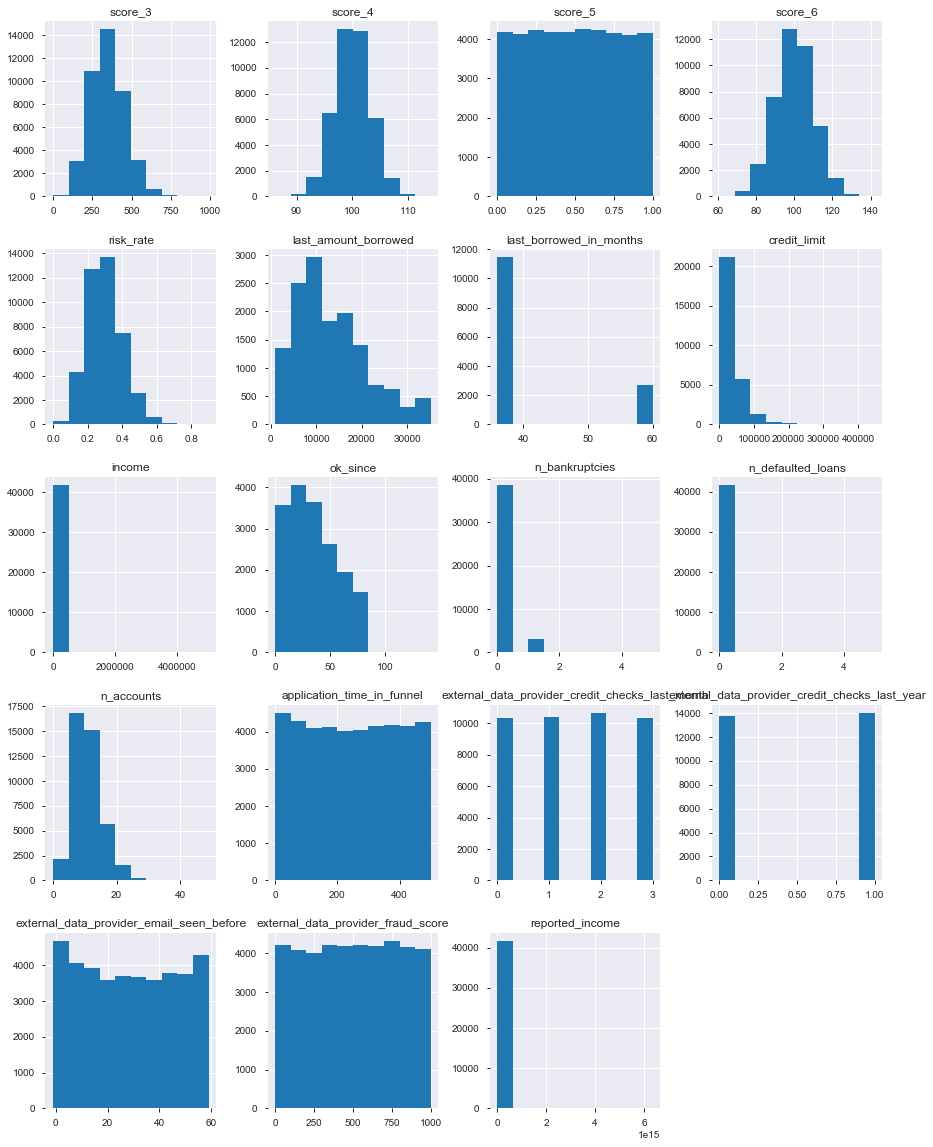

In [269]:

fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df_credit.hist(ax = ax)
#df_credit.hist()

- Categorical variables will be filled with the most recurrent value.
- Numerical variables will be filled with their median values.
- In the specific cases of last_amount_borrowed, last_borrowed_in_months and n_issues we'll fill the missing values with zero, as it is reasonable to believe that not every client would have values assigned to these variables.

In [270]:
df_credit[['last_amount_borrowed', 'last_borrowed_in_months', 'n_accounts']]=df_credit[['last_amount_borrowed', 'last_borrowed_in_months', 'n_accounts']].fillna(value=0)
df_credit.isnull().sum()

target_default                                         0
score_1                                                0
score_2                                                0
score_3                                                0
score_4                                                0
score_5                                                0
score_6                                                0
risk_rate                                              0
last_amount_borrowed                                   0
last_borrowed_in_months                                0
credit_limit                                       13109
reason                                                 4
income                                                 0
state                                                  0
zip                                                    0
job_name                                            2617
real_state                                             0
ok_since                       

In [271]:
df_credit_cat = df_credit.select_dtypes(include = ['object'])
df_credit_num = df_credit.select_dtypes(include = ['number'])
display(df_credit_cat.info())
display(df_credit_num.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41741 entries, 0 to 41740
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   target_default  41741 non-null  object
 1   score_1         41741 non-null  object
 2   score_2         41741 non-null  object
 3   reason          41737 non-null  object
 4   state           41741 non-null  object
 5   zip             41741 non-null  object
 6   job_name        39124 non-null  object
 7   real_state      41741 non-null  object
 8   shipping_state  41741 non-null  object
dtypes: object(9)
memory usage: 2.9+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41741 entries, 0 to 41740
Data columns (total 19 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   score_3                                          41741 non-null  float64
 1   score_4                                          41741 non-null  float64
 2   score_5                                          41741 non-null  float64
 3   score_6                                          41741 non-null  float64
 4   risk_rate                                        41741 non-null  float64
 5   last_amount_borrowed                             41741 non-null  float64
 6   last_borrowed_in_months                          41741 non-null  float64
 7   credit_limit                                     28632 non-null  float64
 8   income                                           41741 non-null  float64
 9   ok_since                    

None

In [272]:
from sklearn.impute import SimpleImputer
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')

idf=pd.DataFrame(imp_median.fit_transform(df_credit_num))
idf.columns=df_credit_num.columns
idf.index=df_credit_num.index

idf.isnull().sum()

score_3                                            0
score_4                                            0
score_5                                            0
score_6                                            0
risk_rate                                          0
last_amount_borrowed                               0
last_borrowed_in_months                            0
credit_limit                                       0
income                                             0
ok_since                                           0
n_bankruptcies                                     0
n_defaulted_loans                                  0
n_accounts                                         0
application_time_in_funnel                         0
external_data_provider_credit_checks_last_month    0
external_data_provider_credit_checks_last_year     0
external_data_provider_email_seen_before           0
external_data_provider_fraud_score                 0
reported_income                               

In [273]:
imp_most_frequent = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

idf_2=pd.DataFrame(imp_most_frequent.fit_transform(df_credit_cat))
idf_2.columns=df_credit_cat.columns
idf_2.index=df_credit_cat.index

idf_2.isnull().sum()

target_default    0
score_1           0
score_2           0
reason            0
state             0
zip               0
job_name          0
real_state        0
shipping_state    0
dtype: int64

In [274]:
df_com = pd.concat([idf,idf_2],axis=1)
df_com.shape

(41741, 28)

In [275]:
df_com.head(3)

,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,application_time_in_funnel,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income,target_default,score_1,score_2,reason,state,zip,job_name,real_state,shipping_state
0,350.0,101.800832,0.259555,108.427273,0.40,25033.92,36.0,0.0,65014.12,32.0,0.0,0.0,18.0,444.0,2.0,0.0,51.0,645.0,57849.0,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,sjJbkqJS7cXalHLBFA+EOQ==,Ernn+uVXCMq/6ARrBCcd+A==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,BR-MT
1,370.0,97.062615,0.942655,92.002546,0.24,0.00,0.0,39726.0,100018.91,50.0,0.0,0.0,14.0,346.0,1.0,0.0,17.0,243.0,4902.0,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,xsd3ZdsI3356I3xMxZeiqQ==,rlWIXTBO+VOa34+SpGyhlQ==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,BR-RS
2,360.0,100.027073,0.351918,112.892453,0.29,7207.92,36.0,25213.0,65023.65,32.0,0.0,0.0,10.0,6.0,2.0,1.0,9.0,65.0,163679.0,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,Ygq6MsM98oC8yceExr69Ig==,PjTIDfJsK0DKL9fO7vuW2g==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,BR-RR


In [276]:
df_credit.head(3)

,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,reason,income,state,zip,job_name,real_state,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,application_time_in_funnel,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income,shipping_state
0,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,25033.92,36.0,0.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65014.12,sjJbkqJS7cXalHLBFA+EOQ==,Ernn+uVXCMq/6ARrBCcd+A==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,NaN,0.0,0.0,18.0,444,2,0.0,51.0,645,57849.0,BR-MT
1,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,0.00,0.0,39726.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,100018.91,xsd3ZdsI3356I3xMxZeiqQ==,rlWIXTBO+VOa34+SpGyhlQ==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,50.0,0.0,0.0,14.0,346,1,0.0,17.0,243,4902.0,BR-RS
2,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,7207.92,36.0,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65023.65,Ygq6MsM98oC8yceExr69Ig==,PjTIDfJsK0DKL9fO7vuW2g==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,NaN,0.0,0.0,10.0,6,2,NaN,9.0,65,163679.0,BR-RR


In [277]:
# df1 = df1.set_index('')
# df2 = df2.set_index('Name')
df_credit.update(df_com)
df_credit.isnull().sum()

target_default                                     0
score_1                                            0
score_2                                            0
score_3                                            0
score_4                                            0
score_5                                            0
score_6                                            0
risk_rate                                          0
last_amount_borrowed                               0
last_borrowed_in_months                            0
credit_limit                                       0
reason                                             0
income                                             0
state                                              0
zip                                                0
job_name                                           0
real_state                                         0
ok_since                                           0
n_bankruptcies                                

# Time to encoding the categorial variables


In [278]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [311]:
col_cat = idf_2.columns
col_cat.values


array(['target_default', 'score_1', 'score_2', 'reason', 'state', 'zip',
       'job_name', 'real_state', 'shipping_state'], dtype=object)

In [312]:
col_cat = ['score_1', 'score_2', 'reason', 'state', 'zip',
       'job_name', 'real_state', 'shipping_state']

In [327]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown = 'ignore')
ct = make_column_transformer(
    (ohe, col_cat),
    remainder='passthrough')

In [328]:
logreg = LogisticRegression(solver='liblinear', random_state=1)

In [329]:
df_credit.head(3)

,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,reason,income,state,zip,job_name,real_state,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,application_time_in_funnel,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income,shipping_state
0,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,25033.92,36.0,0.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65014.12,sjJbkqJS7cXalHLBFA+EOQ==,Ernn+uVXCMq/6ARrBCcd+A==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,32.0,0.0,0.0,18.0,444.0,2.0,0.0,51.0,645.0,57849.0,BR-MT
1,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,0.00,0.0,39726.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,100018.91,xsd3ZdsI3356I3xMxZeiqQ==,rlWIXTBO+VOa34+SpGyhlQ==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,50.0,0.0,0.0,14.0,346.0,1.0,0.0,17.0,243.0,4902.0,BR-RS
2,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,7207.92,36.0,25213.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65023.65,Ygq6MsM98oC8yceExr69Ig==,PjTIDfJsK0DKL9fO7vuW2g==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,32.0,0.0,0.0,10.0,6.0,2.0,1.0,9.0,65.0,163679.0,BR-RR


In [330]:
y = df_credit['target_default']
X = df_credit.drop('target_default',axis=1)

X.head(3)



,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,reason,income,state,zip,job_name,real_state,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,application_time_in_funnel,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income,shipping_state
0,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,25033.92,36.0,0.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65014.12,sjJbkqJS7cXalHLBFA+EOQ==,Ernn+uVXCMq/6ARrBCcd+A==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,32.0,0.0,0.0,18.0,444.0,2.0,0.0,51.0,645.0,57849.0,BR-MT
1,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,0.00,0.0,39726.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,100018.91,xsd3ZdsI3356I3xMxZeiqQ==,rlWIXTBO+VOa34+SpGyhlQ==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,50.0,0.0,0.0,14.0,346.0,1.0,0.0,17.0,243.0,4902.0,BR-RS
2,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,7207.92,36.0,25213.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65023.65,Ygq6MsM98oC8yceExr69Ig==,PjTIDfJsK0DKL9fO7vuW2g==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,32.0,0.0,0.0,10.0,6.0,2.0,1.0,9.0,65.0,163679.0,BR-RR


In [331]:
y.values

array([False, False, True, ..., False, True, False], dtype=object)

In [332]:
y=y.replace(False,0)
y=y.replace(True,1)
y

0        0
1        0
2        1
3        0
4        0
        ..
41736    0
41737    0
41738    0
41739    1
41740    0
Name: target_default, Length: 41741, dtype: int64

In [333]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, stratify=y)
print(X_train.shape)
print(y.shape)

(31305, 27)
(41741,)


In [334]:
col = ['score_1', 'score_2', 'reason', 'state', 'zip',
       'job_name', 'real_state', 'shipping_state']

ct = make_column_transformer(
    (ohe, col),
    remainder='passthrough')



In [335]:
ct.fit_transform(X_train)

<31305x35626 sparse matrix of type '<class 'numpy.float64'>'
	with 721277 stored elements in Compressed Sparse Row format>

In [336]:
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(ct,logreg)

In [337]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['score_1', 'score_2',
                                                   'reason', 'state', 'zip',
                                                   'job_name', 'real_state',
                                                   'shipping_state'])])),
                ('logisticregression',
                 LogisticRegression(random_state=1, solver='liblinear'))])

In [338]:
pipe.named_steps.logisticregression.coef_

array([[-2.91218997e-29, -2.97228745e-29, -1.47207723e-29, ...,
        -3.80463740e-27, -6.45377652e-26, -2.68232337e-16]])

In [339]:
X_test.head(3)

,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,reason,income,state,zip,job_name,real_state,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,application_time_in_funnel,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income,shipping_state
41135,4DLlLW62jReXaqbPaHp1vQ==,pAzpxkhjPsjWldgSX21+zg==,230.0,99.467561,0.624560,113.254102,0.48,0.00,0.0,25213.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,52023.70,rrVbgRNTRyB6auEycsRrpA==,z7w/qM4ebHTAlQSGcMs35A==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,82.0,0.0,0.0,8.0,433.0,3.0,0.0,14.0,783.0,119838.0,BR-AM
11995,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,460.0,97.923539,0.753237,110.611762,0.18,0.00,0.0,12674.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,45010.13,KET/Pmr6rHp1RJ/P9ymztw==,Cc/kWDLQH3dpHv5HU+pLVA==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,nSpvDsIsslUaX6GE6m6eQA==,32.0,0.0,0.0,14.0,341.0,1.0,1.0,17.0,552.0,181905.0,BR-MA
40133,1Rk8w4Ucd5yR3KcqZzLdow==,/tdlnWjXoZ3OjdtBXzdOJQ==,360.0,100.103348,0.057312,105.706289,0.43,10017.27,36.0,63239.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,55019.97,rrVbgRNTRyB6auEycsRrpA==,9d7BQ8GEM42Ph6cyQIgvgA==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,16.0,0.0,0.0,17.0,341.0,0.0,1.0,28.0,537.0,90494.0,BR-SP


In [342]:
y_pred = pipe.predict(X_test)

In [348]:
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.8404561134534304


In [350]:
# IMPORTANT: first argument is true values, second argument is predicted values
# this produces a 2x2 numpy array (matrix)
print(metrics.confusion_matrix(y_test, y_pred))

[[8771    0]
 [1665    0]]


In [351]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[8771    0]
 [1665    0]]


# how often is the classifier correct?

In [352]:
# use float to perform true division, not integer division
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred))

0.8404561134534304
0.8404561134534304


# how often is the classifier incorrect?

In [354]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
print(1 - metrics.accuracy_score(y_test, y_pred))

0.15954388654656956
0.1595438865465696


# When the actual value is positive, how often is the prediction correct?

In [355]:
sensitivity = TP / float(FN + TP)

print(sensitivity)
print(metrics.recall_score(y_test, y_pred))

0.0
0.0


# Specificity: When the actual value is negative, how often is the prediction correct?

In [357]:
specificity = TN / (TN + FP)

print(specificity)

1.0


## Change to another method, try standardise 


In [398]:
# Go through column transform to convert cat variable to numerical variable
X_train_transformed = ct.fit_transform(X_train)

In [399]:

# standardize numerical variables
sc =StandardScaler(with_mean=False)
X_train_scaled =sc.fit_transform(X_train_transformed)

# resample
rus = RandomUnderSampler()
X_train_rus, y_train_rus = rus.fit_sample(X_train_scaled, y_train)

In [400]:
pipe = make_pipeline(ct, StandardScaler(with_mean=False),logreg)

In [401]:
pipe.fit(X_train, y_train)
pipe.named_steps

{'columntransformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('onehotencoder',
                                  OneHotEncoder(handle_unknown='ignore'),
                                  ['score_1', 'score_2', 'reason', 'state',
                                   'zip', 'job_name', 'real_state',
                                   'shipping_state'])]),
 'standardscaler': StandardScaler(with_mean=False),
 'logisticregression': LogisticRegression(random_state=1, solver='liblinear')}

In [403]:
X_test_transform = ct.transform(X_test)
X_test_scaled = sc.transform(X_test_transform)

y_pred = pipe.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [389]:
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.7842085090072825


In [391]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[7969  802]
 [1450  215]]


In [392]:
# use float to perform true division, not integer division
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred))

0.7842085090072825
0.7842085090072825


# When the actual value is positive, how often is the prediction correct?

In [394]:
sensitivity = TP / float(FN + TP)

print(sensitivity)
print(metrics.recall_score(y_test, y_pred))

0.12912912912912913
0.12912912912912913


# Specificity: When the actual value is negative, how often is the prediction correct?

In [395]:
specificity = TN / (TN + FP)

print(specificity)

0.9085623076046061


In [416]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, cross_val_score
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [417]:

#evaluate the models
xgb = XGBClassifier()
lgb = LGBMClassifier()
cb = CatBoostClassifier()

model = []
recall = []

In [418]:
X_test_transform = ct.transform(X_test)
X_test_scale = sc.transform(X_test_transform)

In [419]:
for clf in (xgb,lgb,cb):
    pipe = make_pipeline(ct, StandardScaler(with_mean=False),clf)
    pipe.fit(X_train, y_train)
    
    y_pred = pipe.predict(X_test)
    
    model.append(clf.__class__.__name__)
    recall.append(metrics.accuracy_score(y_test, y_pred))
    
pd.DataFrame(data=recall, index=model, columns=['Recall'])
    
    

AttributeError: function 'XGDMatrixSetDenseInfo' not found

In [ ]:
# Package the functions to make an model evaluation function

def val_model(X,y,clf):
    
